# Results from the CNF-isopropanol injection experiments

Carbon nanofibers (CNFs) were suspended in isopropanol at 3 mg/ml. The suspension was repeatedly injected into a chip with XL- and L-sized serpentine channels. The accumulation of CNFs inside the channel was tracked by images after each iteration. After the 5th injection (following baking and imaging) I measured the conductance (channels do not contain any resin). Experiments were conducted in Apr 2023.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import numpy as np
from statistics import mean, stdev
from typing import Tuple

### Path where figures are saved to - change as needed

In [4]:
user_home_dir = os.path.expanduser('~')
glob_figpath = os.path.join(user_home_dir, 'data/cnf_isopropanol_inject')
if not os.path.exists(glob_figpath):
    os.makedirs(glob_figpath)

## Resistance values from Excel sheet "resistance.xlsx" in `artificial_muscle\images\cnf_isopropanol_loading`

### Scatter Plot Method

In [156]:
def plot_scatter(xdata:list, ydata:list, yerr:list, title=None, xlabel=None, xlabel_prefix=None, xlim=None,
                 xticklabels:str=None, ylabel=None, figname=None, ylim=None, yscale='linear',
                 plotsize_adjust:dict=None, hide_inner:bool=False, capsize=5, 
                 subplot_config:dict={'nrows': 1, 'ncols': 2}, colors=None, errbar_dir:str='both') -> None:
    """Create scatterplot of data with standard deviation as errorbars"""
    fig, ax = plt.subplots(subplot_config['nrows'], subplot_config['ncols'])
    fig.suptitle(title)
    if not colors:
        colors = ['tab:blue', 'tab:orange']
    if errbar_dir == 'up':
        if len(yerr) == 1:
            _yerr = np.zeros((2, len(yerr[0])))
            _yerr[1, :] = yerr[0]
            yerr[0] = _yerr
        else:
            for idx, err in enumerate(yerr):
                _yerr = np.zeros((2, len(err)))
                _yerr[1, :] = err
                yerr[idx] = _yerr
    data = list(zip(xdata, ydata, yerr))
    if (subplot_config['nrows'] == 1 and subplot_config['ncols'] == 1):
        for idx, datum in enumerate(data):
            ax.errorbar(datum[0], datum[1], yerr=datum[2], capsize=capsize, ecolor=mcolors.TABLEAU_COLORS[colors[idx]],
                        marker='o', markerfacecolor=mcolors.TABLEAU_COLORS[colors[idx]], 
                        markeredgecolor=mcolors.TABLEAU_COLORS[colors[idx]], markersize=10, linestyle='none')
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.set_yscale(yscale)
            if xlim:
                ax.set_xlim(xlim)
            if ylim:
                ax.set_ylim(ylim)
    else:
        for idx, datum in enumerate(data):
            ax[idx].errorbar(datum[0], datum[1], yerr=datum[2], capsize=capsize, ecolor=mcolors.TABLEAU_COLORS[colors[idx]],
                             marker='o', markerfacecolor=mcolors.TABLEAU_COLORS[colors[idx]], 
                             markeredgecolor=mcolors.TABLEAU_COLORS[colors[idx]], markersize=10, linestyle='none')
            if xlabel_prefix:
                ax[idx].set_xlabel(f'{xlabel_prefix} ({xlabel[idx]})')
            else:
                ax[idx].set_xlabel(f'{xlabel[idx]}')
            ax[idx].set_xticks(datum[0])
            ax[idx].set_ylabel(ylabel)
            if xlim:
                ax[idx].set_xlim(xlim)  # x-ticks are too far apart and to close to the edge of the frame - this corrects for that
            ax[idx].set_yscale(yscale)
            if ylim:
                ax[idx].set_ylim(ylim)
        # Hide x labels and tick labels for top plots and y ticks for right plots.
    if hide_inner:
        for a in ax.flat:
            a.label_outer()
    else:
        fig.tight_layout(pad=4.0)
    if plotsize_adjust:
        fig.subplots_adjust(left=plotsize_adjust['left'],
                            right=plotsize_adjust['right'], 
                            top=plotsize_adjust['top'], 
                            bottom=plotsize_adjust['bottom'])
    #if xticklabels:
    #        ax.set_xticklabels(xticklabels)
    if figname:
        figpath = os.path.join(glob_figpath, figname)
        fig.savefig(figpath)

#### Lists of measured electr. resistances. Values are in K$\Omega$.
Values are from only one chip (chip #5). The variance is very high.

In [157]:
# Means and standard deviation from n=100 samples.
L_xticks = ['1', '2', '3']
L = [1214.9, 72.4, 799.9]
L_err = [0.036, 0.49, 20.45]
XL_xticks = ['1', '2', '3']
XL = [115.626, 43.4411, 695.156]
XL_err = [0.329, 0.807, 22.89]

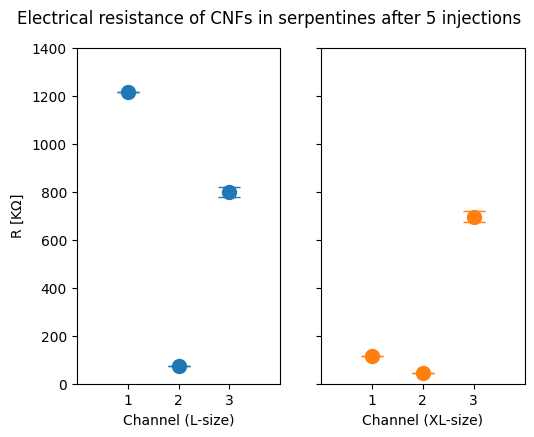

In [158]:
title = 'Electrical resistance of CNFs in serpentines after 5 injections'
ylabel = 'R [K$\Omega$]'
figname = 'resistance_cnf_isoprop_inject_chip5.png'
xlabel_prefix = "Channel"
xlabel = ['L-size', 'XL-size']
colors = [[0, 0, 1], [1, 0, 0]]
xlim = [-1.0, 3.0]
ylim = [0, 1400]
capsize = 8
subplot_config = {'nrows': 1, 'ncols': 2}
plotsize_adjust = {'left': 0.2, 'right': 0.9, 'top': 0.9, 'bottom': 0.2}
plot_scatter([L_xticks, XL_xticks], [L, XL], yerr=[L_err, XL_err], title=title, xlabel=xlabel, xlabel_prefix=xlabel_prefix,
             xlim=xlim, ylabel=ylabel, ylim=ylim, figname=figname, hide_inner=True, plotsize_adjust=plotsize_adjust,
            capsize=8, subplot_config=subplot_config)

## Tracking the resistance of channels after each injection cycle

### Lists of measured electr. resistances for sizes and XL and L and their standard deviations. Values are in K$\Omega$.

In [176]:
XL = [62098.33333, 749.7616667, 13369.24, 176.905, 64.275]
XL_err = [73251.39218, 577.5722407, 26465.95691, 161.8318961, 13.75911734]
L = [102226.6667, 2858.068333, 3208.798333, 140.6316667, 82.32666667]
L_err = [83636.80617, 4027.059607, 5888.752855, 52.74959997, 38.4885072]

### Scatter plots

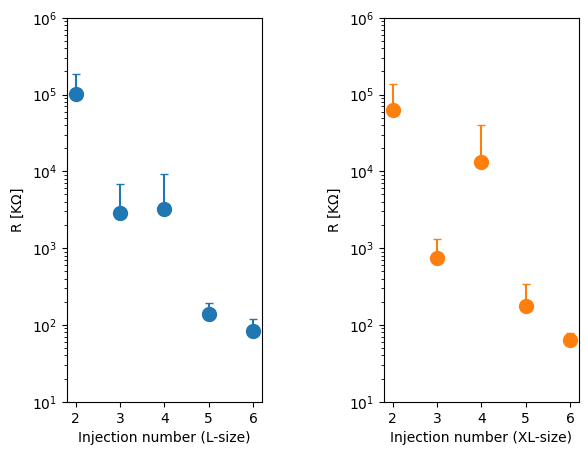

In [178]:
title = 'Channel size XL'
ylabel = 'R [K$\Omega$]'
xlabel = ['L-size', 'XL-size']
xlabel_prefix = 'Injection number'
xticks = list(range(2, 7))
ylim = [1e1, 1e6]
plotsize_adjust = {'left': 0.1, 'right': 0.9, 'top': 0.9, 'bottom': 0.1}
capsize = 3
subplot_config = {'nrows': 1, 'ncols': 2}
figname = 'resistance_tracking_scatter.png'
plot_scatter([xticks, xticks], [L, XL], yerr=[L_err, XL_err], xlabel=xlabel, xlabel_prefix=xlabel_prefix,
             figname=figname, ylabel=ylabel, ylim=ylim, yscale='log', plotsize_adjust=plotsize_adjust, capsize=capsize, 
             subplot_config=subplot_config, errbar_dir='up')

## Graphene injection

In [161]:
XL_before = [50.19, 61.15, 46.34, 77.56, 74.39, 76.02]
XL_after = [23.71, 17.49, 11.26, 10.62, 23.94, 16.79]
XL_before_mean = mean(XL_before)
XL_after_mean = mean(XL_after)
XL_before_stdev = stdev(XL_before)
XL_after_stdev = stdev(XL_after)

### Scatter plots

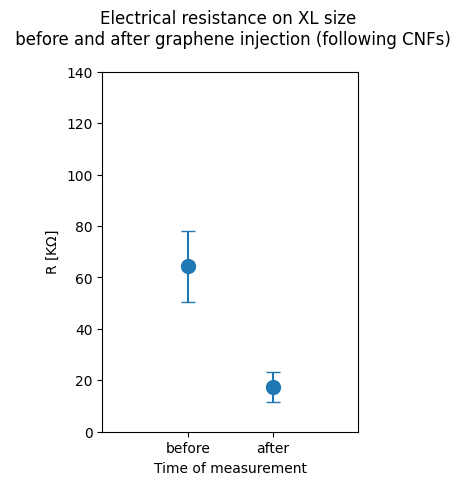

In [162]:
title = 'Electrical resistance on XL size \n before and after graphene injection (following CNFs)'
xlabel = 'Time of measurement'
ylabel = 'R [K$\Omega$]'
xticks = ['before', 'after']
xlim = [-1, 2]
ylim = [0, 140]
colors = ['tab:blue', 'tab:blue']
subplot_config = {'nrows': 1, 'ncols': 1}
plotsize_adjust = {'left': 0.3, 'right': 0.7, 'top': 0.85, 'bottom': 0.1}
figname = 'resistance_XL_size_cnf_graphene_isoprop_inject_scatter.png'
plot_scatter(xticks, [XL_before_mean, XL_after_mean], yerr=[XL_before_stdev, XL_after_stdev], title=title, xlabel=xlabel,
             ylabel=ylabel, figname=figname, xlim=xlim, ylim=ylim, subplot_config=subplot_config, 
             plotsize_adjust=plotsize_adjust, colors=colors)

In [163]:
L_before = [39.42, 77.05, 48.14, 92.06, 147.25, 90.04]
L_after = [14.38, 14.35, 14.44, 22.8, 22.09, 23.5]
L_before_mean = mean(L_before)
L_after_mean = mean(L_after)
L_before_stdev = stdev(L_before)
L_after_stdev = stdev(L_after)

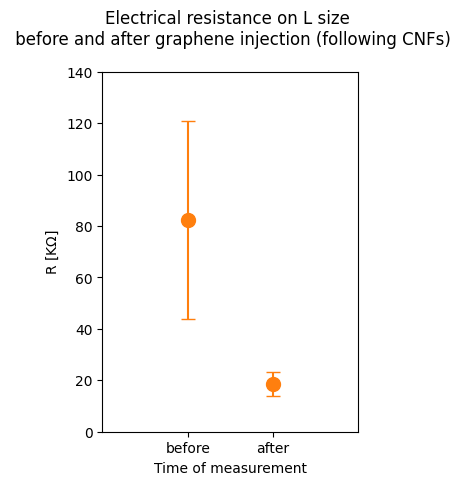

In [164]:
title = 'Electrical resistance on L size \n before and after graphene injection (following CNFs)'
colors = ['tab:orange', 'tab:orange']
figname = 'resistance_L_size_cnf_graphene_isoprop_inject_scatter.png'
plot_scatter(xticks, [L_before_mean, L_after_mean], yerr=[L_before_stdev, L_after_stdev], title=title, xlabel=xlabel,
             ylabel=ylabel, figname=figname, xlim=xlim, ylim=ylim, subplot_config=subplot_config, 
             plotsize_adjust=plotsize_adjust, colors=colors)

## Silverpast on PCB

In [173]:
fraction_added = [[10, 20, 100]]
conductivity = [[0.000236557, 0.00172725, 2777.590535]]
yerr = [[7.22857e-05, 0.002687744, 1.60e+03]]

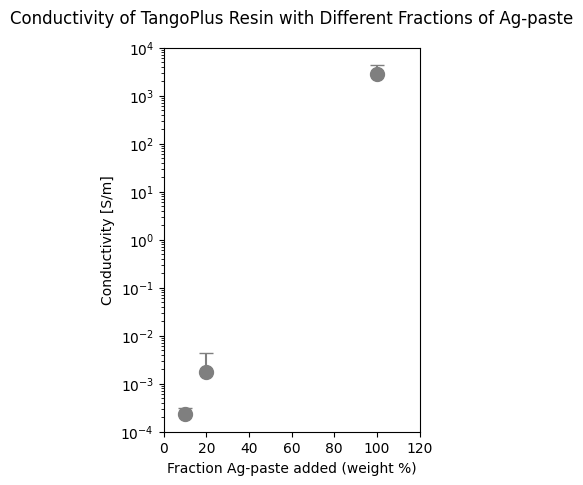

In [174]:
title = 'Conductivity of TangoPlus Resin with Different Fractions of Ag-paste'
xlabel = 'Fraction Ag-paste added (weight %)'
ylabel = 'Conductivity [S/m]'
xlim = [0, 120]
ylim = [1e-4, 1e4]
colors = ['tab:gray', 'tab:gray', 'tab:gray']
subplot_config = {'nrows': 1, 'ncols': 1}
plotsize_adjust = {'left': 0.3, 'right': 0.7, 'top': 0.9, 'bottom': 0.1}
figname = 'conductivity_silverpaste_on_pcb.png'
plot_scatter(fraction_added, conductivity, yerr=yerr, title=title, xlabel=xlabel,
             ylabel=ylabel, figname=figname, xlim=xlim, ylim=ylim, subplot_config=subplot_config, 
             plotsize_adjust=plotsize_adjust, colors=colors, yscale='log', errbar_dir='up')